# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

### О проекте. #####

Добывающей компании «ГлавРосГосНефть», нужно решить, где бурить новую скважину. Предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. 

Шаги для выбора локации обычно такие:
- В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
- Строят модель для предсказания объёма запасов в новых скважинах;
- Выбирают скважины с самыми высокими оценками значений;
- Определяют регион с максимальной суммарной прибылью отобранных скважин.

### Цель. #####

- Построить модель для определения региона, где добыча принесёт наибольшую прибыль.
- Проанализировать возможную прибыль и риски техникой Bootstrap.


### План. ###

- Загрузить и подготовить данные.
- Обучить и проверить модель для каждого региона.
- Подготовить значения к расчёту прибыли.
- Написать функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели.
- Посчитать риски и прибыль для каждого региона.

## Загрузка и подготовка данных

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle
import numpy
import warnings

ModuleNotFoundError: No module named 'pandas_profiling'

In [2]:
warnings.filterwarnings('ignore')

In [3]:
first_region = pd.read_csv("/datasets/geo_data_0.csv")
second_region = pd.read_csv("/datasets/geo_data_1.csv")
third_region = pd.read_csv("/datasets/geo_data_2.csv")

In [4]:
first_region.info()
first_region.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


 `Ответ:` ✔

In [5]:
second_region.info()
second_region.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


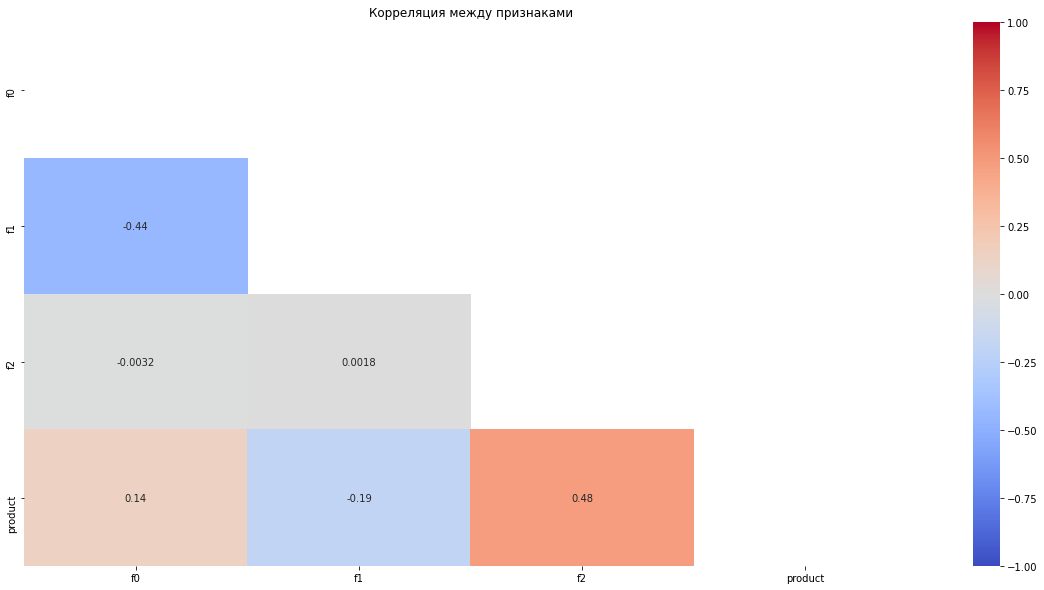

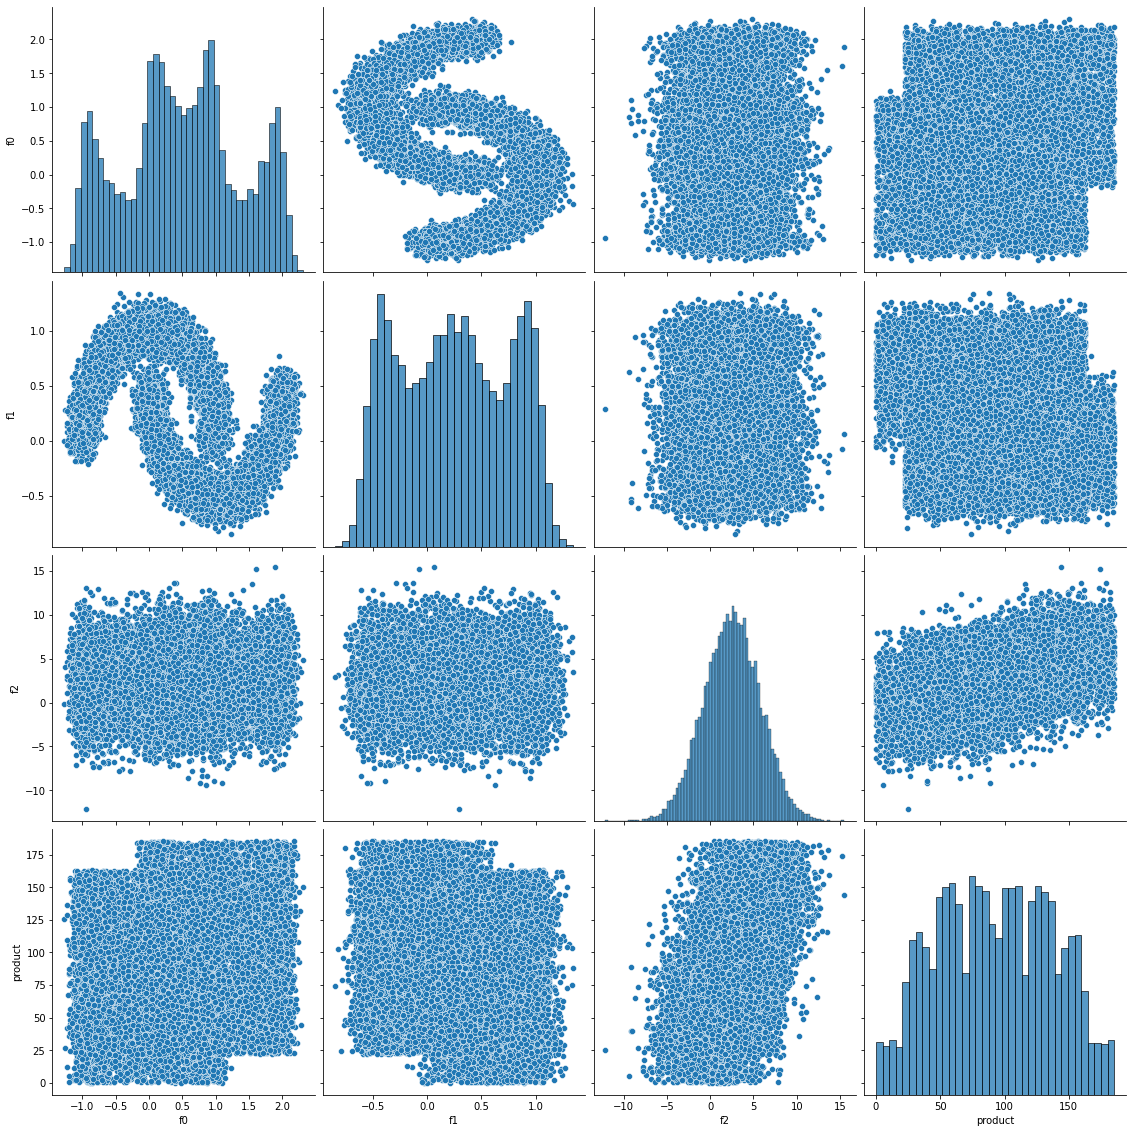

In [40]:
import numpy as np

def show_corr(region):

    plt.figure(figsize = (20, 10))
    plt.title('Корреляция между признаками')
    sns.heatmap(region.corr(), annot=True, mask=np.triu(region.corr()), 
                cmap='coolwarm', vmin=-1, vmax=1, center= 0);

    sns.pairplot(region.drop('id', axis=1).sample(frac = 0.2, random_state = 42), height = 4);
    
show_corr(first_region)

In [6]:
print(first_region.duplicated().sum())
print(second_region.duplicated().sum())
print(third_region.duplicated().sum())


0
0
0


Явных дубликатов нет, теперь посмотрим уникальные id

In [7]:
print(first_region["id"].nunique())
print(second_region["id"].nunique())
print(third_region["id"].nunique())
first_region = first_region.drop_duplicates(subset=['id'])
second_region = second_region.drop_duplicates(subset=['id'])
third_region = third_region.drop_duplicates(subset=['id'])

99990
99996
99996


Так же мы избавились от id дубликатов.

In [8]:
third_region.info()
third_region.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99996 non-null  object 
 1   f0       99996 non-null  float64
 2   f1       99996 non-null  float64
 3   f2       99996 non-null  float64
 4   product  99996 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


### Вывод. ###

Данные подготовлены, теперь можем перейти к исследованию.

## Обучение и проверка модели

Разобьем исходные данные разбиты в соотношении 3:1

In [9]:
first_region_train, first_region_valid = train_test_split(first_region, test_size=0.25, random_state=12345)
second_region_train, second_region_valid = train_test_split(second_region, test_size=0.25, random_state=12345)
third_region_train, third_region_valid = train_test_split(third_region, test_size=0.25, random_state=12345)


Разделим на признаки и на целевой признак каждую выборку.

In [10]:
first_features_train = first_region_train.drop(["id", "product"], axis=1)
first_target_train = first_region_train["product"]

first_features_valid = first_region_valid.drop(["id", "product"], axis=1)
first_target_valid = first_region_valid["product"]


second_features_train = second_region_train.drop(["id", "product"], axis=1)
second_target_train = second_region_train["product"]

second_features_valid = second_region_valid.drop(["id", "product"], axis=1)
second_target_valid = second_region_valid["product"]


third_features_train = third_region_train.drop(["id", "product"], axis=1)
third_target_train = third_region_train["product"]

third_features_valid = third_region_valid.drop(["id", "product"], axis=1)
third_target_valid = third_region_valid["product"]


Проведем стандартизацию.

In [11]:
scaler = StandardScaler()
scaler.fit(first_features_train)


first_features_train = pd.DataFrame(scaler.transform(first_features_train))
first_target_train = first_target_train.reset_index(drop = True)

first_features_valid = pd.DataFrame(scaler.transform(first_features_valid))
first_target_valid = first_target_valid.reset_index(drop = True)

In [12]:
scaler = StandardScaler()
scaler.fit(second_features_train)


second_features_train = pd.DataFrame(scaler.transform(second_features_train))
second_target_train = second_target_train.reset_index(drop = True)

second_features_valid = pd.DataFrame(scaler.transform(second_features_valid))
second_target_valid = second_target_valid.reset_index(drop = True)

In [13]:
scaler = StandardScaler()
scaler.fit(third_features_train)


third_features_train = pd.DataFrame(scaler.transform(third_features_train))
third_target_train = third_target_train.reset_index(drop = True)

third_features_valid = pd.DataFrame(scaler.transform(third_features_valid))
third_target_valid = third_target_valid.reset_index(drop = True)

Для обучения модели возьмем линейную регрессию.

In [16]:
lr = LinearRegression()
first_model = lr.fit(first_features_train, first_target_train)
first_model.fit(first_features_train, first_target_train) 
first_predictions_valid = first_model.predict(first_features_valid) 

first_result = mean_squared_error(first_target_valid, first_predictions_valid)**0.5
print("Данные первого региона:")
print('Средний запас:', first_predictions_valid.mean())
print("RMSE модели:", first_result)

Данные первого региона:
Средний запас: 92.78915638280621
RMSE модели: 37.853527328872964


In [17]:
lr = LinearRegression()
second_model = lr.fit(second_features_train, second_target_train)
second_model.fit(second_features_train, second_target_train) 
second_predictions_valid = second_model.predict(second_features_valid) 

second_result = mean_squared_error(second_target_valid, second_predictions_valid)**0.5
print("Данные второго региона:")
print('Средний запас:', second_predictions_valid.mean())
print("RMSE модели:", second_result)

Данные второго региона:
Средний запас: 69.1783195703043
RMSE модели: 0.8920592647717033


In [18]:
lr = LinearRegression()
third_model = lr.fit(third_features_train, third_target_train)
third_model.fit(third_features_train, third_target_train) 
third_predictions_valid = third_model.predict(third_features_valid) 

third_result = mean_squared_error(third_target_valid, third_predictions_valid)**0.5
print("Данные третьего региона:")
print('Средний запас:', third_predictions_valid.mean())
print("RMSE модели:", third_result)

Данные третьего региона:
Средний запас: 94.86572480562035
RMSE модели: 40.07585073246016


### Вывод ###

- Первый регион по ошибке на 2 месте и по среднему запасу также на 2 месте.
- Второй регион по ошибке на 1 месте и она почти близка к 0, но по среднему запасу на 3 месте.
- Третий регион по ошибке на 3 место, имея наибольшую среди всех регионов, но на 1 место по среднему запасу.

## Подготовка к расчёту прибыли

In [19]:
ALL_SPOTS = 500
ML_SPOTS = 200
BUDGET = 10**10
PRICE = 450000
PERCENT = 0.0025
BREAK_EVEN = round(BUDGET / PRICE / ML_SPOTS)
BREAK_EVEN

111

Получается, чтобы для безубыточной добычи топлива необходимо, чтобы каждая скважина в среднем содержала не менее 111 тысяч баррелей.
Составим сводную таблицу.

In [20]:
temp_table = pd.DataFrame({'Средний запас': [first_predictions_valid.mean(),
                                             second_predictions_valid.mean(), third_predictions_valid.mean()],
                                   'Количество тыс. баррелей для выхода в 0': [BREAK_EVEN]*3})

temp_table['Окуп'] = temp_table["Средний запас"] > temp_table["Количество тыс. баррелей для выхода в 0"]
temp_table

,Средний запас,Количество тыс. баррелей для выхода в 0,Окуп
0,92.789156,111,False
1,69.178320,111,False
2,94.865725,111,False


### Вывод. ###

- Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки - 111 тысяч баррелей.
- Из этого выясняется , что брать случайные скважины не лучшая идея, а лучше стоит найти в каждом регионе самые полные скважины.

## Расчёт прибыли и рисков 

In [21]:
def revenue(target, probabilities):
    probs_sorted = pd.Series(probabilities).sort_values(ascending=False)
    selected = target[probs_sorted.index][:ML_SPOTS]
    return round((selected.sum() * PRICE) - BUDGET)

In [22]:
print("Прибыль лучших скважин в 1 регионе:", revenue(first_target_valid, first_predictions_valid))

Прибыль лучших скважин в 1 регионе: 3365187238


In [23]:
print("Прибыль лучших скважин в 2 регионе:", revenue(second_target_valid, second_predictions_valid))

Прибыль лучших скважин в 2 регионе: 2415086697


In [24]:
print("Прибыль лучших скважин в 3 регионе:", revenue(third_target_valid, third_predictions_valid))

Прибыль лучших скважин в 3 регионе: 2501283853


Теперь посчитаем риски.

In [25]:
state = numpy.random.RandomState(12345)


In [26]:
def bootstrap(target, probabilities):
    values = []
    for i in range(1000):
        target_subsample = probabilities.sample(n = ALL_SPOTS, replace=True, random_state=state)
        probs_subsample = probabilities[target_subsample.index] 
        values.append(revenue(target, probs_subsample))
           
    values = pd.Series(values)
    print("Средняя прибыль:", values.mean())
    print("Риски:", (values<0).mean()*100,"%")
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    return lower, upper
 

In [27]:
print("95% доверительный итервал 1 региона", bootstrap(first_target_valid, pd.Series(first_predictions_valid)))
print()
print("95% доверительный итервал 2 региона", bootstrap(second_target_valid, pd.Series(second_predictions_valid)))
print()
print("95% доверительный итервал 3 региона", bootstrap(third_target_valid, pd.Series(third_predictions_valid)))


Средняя прибыль: 380613470.01
Риски: 7.7 %
95% доверительный итервал 1 региона (-142942739.325, 890976833.425)

Средняя прибыль: 479159869.99
Риски: 0.6 %
95% доверительный итервал 2 региона (73849212.10000001, 917953817.9499999)

Средняя прибыль: 315441916.036
Риски: 12.4 %
95% доверительный итервал 3 региона (-216265050.225, 811060708.5999999)


### Вывод. ###

- 1 регион
    - Прибыль лучших скважин в 1 регионе: 3320826043
    - Средняя прибыль: 382692575.238
    - Риски: 7.2 %
    - Доверительный итервал (-128127164.05, 884164318.975)

- 2 регион
    - Прибыль лучших скважин в 1 регионе: 2415086697
    - Средняя прибыль: 450697226.332
    - Риски: 1.5 %
    - Доверительный итервал (52435364.150000006, 854500657.8249999)
    
- 3 регион
    - Прибыль лучших скважин в 1 регионе: 2710349964
    - Средняя прибыль: 389811799.568
    - Риски: 8.3 %
    - Доверительный итервал (-163039127.29999998, 877264279.8249998)
    
    
По условию подходит 2 регион с рисками 1.5% и с самой наибольшей средней прибылью.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован

## Общий вывод ##

- Загрузка и подготовка данных
    - Данные подготовлены, теперь можем перейти к исследованию.
    
    
- Обучение и проверка модели
    - Первый регион по ошибке на 2 месте и по среднему запасу также на 2 месте.
    - Второй регион по ошибке на 1 месте и она почти близка к 0, но по среднему запасу на 3 месте.
    - Третий регион по ошибке на 3 место, имея наибольшую среди всех регионов, но на 1 место по среднему запасу. 
    
    
- Подготовка к расчёту прибыли
    - Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки - 111 тысяч баррелей.
    - Из этого выясняется , что все скважины окажутся убыточными.
    
    
- Расчёт прибыли и рисков
    - 1 регион
        - Прибыль лучших скважин в 1 регионе: 3320826043
        - Средняя прибыль: 382692575.238
        - Риски: 7.2 %
        - Доверительный итервал (-128127164.05, 884164318.975)

    - 2 регион
        - Прибыль лучших скважин в 1 регионе: 2415086697
        - Средняя прибыль: 450697226.332
        - Риски: 1.5 %
        - Доверительный итервал (52435364.150000006, 854500657.8249999)
    
    - 3 регион
        - Прибыль лучших скважин в 1 регионе: 2710349964
        - Средняя прибыль: 389811799.568
        - Риски: 8.3 %
        - Доверительный итервал (-163039127.29999998, 877264279.8249998)
    
- По условию подходит 2 регион с рисками 1.5% и с самой наибольшей средней прибылью (450697226.332).